TRABAJO FINAL MASTER
ALUMNO: JULIO DOUGLAS ANTONIO RUIZ GONZALEZ.

DIRECTOR TFM: Dr. ADRIAN COLOMER GRANERO.


PARTE 3.
Se tratan los temas del trabajo final de Master.
 
4.4 Ingenieria de caracteristicas.
capitulo 5: Desarrollo experimental.
capitulo 6: Resultados 

Entrenamiento LIGTH GBM CON n_split = 3; 

1. Instalacion de librerias API fucnional de Keras, bakend Tensor Flow e importacion de datasets.
2. Se dividen los datos en Aprendizaje y pruebas: se toman meses en ambos conjuntos de daos que son representativos para las cuatro estaciones anuales.
3. Caracteristicas de ingeniera : para mejorar los datos en el    aprendizaje automático supervisado, con esta técnica se intenta mejorar el poder predictivo del algoritmo de aprendizaje en este caso las redes neuronales artificiales recurrentes LSTM y LigthGBM, utilizdo los datos sin procesar, datos limpios.
4. Escalado de datos previo a entrenar los algoritmos de Light GBM.
5. Se encuentran hiperparametros para el mejor valor y hacer el entrenamiento con Light GBM K-Fold (n_split=3) evaluando la importancia de cada variable.
6. Evaluacion del algoritmo Light GBM a traves de metricas establecidas.
7. Bibliografia.


1. Instalacion de librerias API fucnional de Keras, bakend Tensor Flow e importacion de datasets.

In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.14.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.14.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.14.0


In [ ]:
!pip install setuptools wheel numpy scipy "scikit-learn<=0.21.3" -U

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (46.2.0)
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.34.2)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.4.1)
Requirement already up-to-date: scikit-learn<=0.21.3 in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [ ]:
!pip install tensorflow==1.14

  Using cached https://files.pythonhosted.org/packages/de/f0/96fb2e0412ae9692dbf400e5b04432885f677ad6241c088ccc5fe7724d69/tensorflow-1.14.0-cp36-cp36m-manylinux1_x86_64.whl


In [ ]:
% tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import lightgbm as lgb


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)
from sklearn import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from math import sqrt
import gc
sns.set()
import plotly.express as px
import missingno as msno
pd.set_option('max_columns', 150)


from sklearn import preprocessing
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam
from keras import regularizers




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.15.2


Using TensorFlow backend.


In [ ]:
BASE_FOLDER = '/content/drive/My Drive/TFM IA Julio Ruiz/'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1 = BASE_FOLDER+ "train_df.csv"
path2 = BASE_FOLDER+ "test_df.csv"


In [ ]:
train_df = pd.read_csv(path1)
test_df = pd.read_csv(path2)


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Memoria usada disminuida a {:5.2f} Mb ({:.1f}% reduccion)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Memoria usada disminuida a 697.47 Mb (69.5% reduccion)
Memoria usada disminuida a 1471.34 Mb (69.2% reduccion)


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int16  
 1   meter               int8   
 2   site_id             int8   
 3   primary_use         int8   
 4   square_meter        float32
 5   timestamp           object 
 6   year_built          float16
 7   air_temperature     float16
 8   cloud_coverage      float16
 9   dew_temperature     float16
 10  precip_depth_1_hr   float16
 11  sea_level_pressure  float16
 12  wind_direction      float16
 13  wind_speed          float16
 14  original_index      int32  
dtypes: float16(8), float32(1), int16(1), int32(1), int8(3), object(1)
memory usage: 1.4+ GB


In [ ]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'],format='%Y-%m-%d %H')
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'],format='%Y-%m-%d %H')

2. Se dividen los datos en Aprendizaje y pruebas: se toman meses en ambos conjuntos de daos que son representativos para las cuatro estaciones anuales.

In [ ]:
final_test = test_df
vals = {1,4,7,10}
test = train_df[(train_df['timestamp'].dt.month.isin(vals))]

train_w, test = train_test_split(test,test_size=.50,random_state=42)
vals= {2,3,5,6,8,9,11,12}
train = train_df[(train_df['timestamp'].dt.month.isin(vals))]

train=pd.concat([train,train_w],axis=0)

In [ ]:
print('Entrenando con',round(100*len(train)/(len(train)+len(test))),'% de los datos originales de entrenamiento')
print('Entrenando con ',round(100*len(test)/(len(train)+len(test))),'% de los datos originales de pruebas')
print('Prueba final con el 100% de los datos de prueba originales')

Entrenando con 83 % de los datos originales de entrenamiento
Entrenando con  17 % de los datos originales de pruebas
Prueba final con el 100% de los datos de prueba originales


3. Caracteristicas de ingeniera : para mejorar los datos en el    aprendizaje automático supervisado, con esta técnica se intenta mejorar el poder predictivo del algoritmo de aprendizaje en este caso las redes neuronales artificiales recurrentes LSTM y LigthGBM, utilizdo los datos sin procesar, datos limpios.

In [ ]:
def feature_engineering(data):
    # Ordenar por marca de tiempo
    data.sort_values("timestamp")
    data.reset_index(drop=True)

    ## mas funciones
    # tiempo
    
    data["hour"] = data["timestamp"].dt.hour
    data["day"] = data["timestamp"].dt.day
    data["week"] = data["timestamp"].dt.week
    data["month"] = data["timestamp"].dt.month
    data["weekday"] = data["timestamp"].dt.weekday
    

    
    for name in list(data):
        if name == "meter_reading":
            # meter_reading, porque la distribución no es normal, está sesgada
            data['log_meter_reading'] =  np.log(data['meter_reading'])
            #data.drop(['square_feet'],axis=1,inplace=True) 

    for name in list(data):
        if name == "square_meter":
            # square_meter, porque la distribución no es normal, está sesgada
            data['log_square_meter'] =  np.log(data['square_meter'])
            #data.drop(['square_feet'],axis=1,inplace=True) 

    for name in list(data): 
        if name == "floor_count":
            # floor_count, porque la distribución no es normal, está sesgada
            data['log_floor_count'] =  np.log(data['floor_count'])
            #data.drop(['floor_count'],axis=1,inplace=True) 
    
    
    for name in list(data):
        if name == 'dew_temperature':
            # dew_temperature, porque la distribución no es normal, está sesgada
            data['square_dew_temperature'] =  np.square(data['dew_temperature'])
    

    # Dias festivos
    holidays = ["2016-01-01", "2016-01-18", "2016-02-15", "2016-05-30", "2016-07-04",
            "2016-09-05", "2016-10-10", "2016-11-11", "2016-11-24", "2016-12-26",
            "2017-01-01", "2017-01-16", "2017-02-20", "2017-05-29", "2017-07-04",
            "2017-09-04", "2017-10-09", "2017-11-10", "2017-11-23", "2017-12-25",
            "2018-01-01", "2018-01-15", "2018-02-19", "2018-05-28", "2018-07-04",
            "2018-09-03", "2018-10-08", "2018-11-12", "2018-11-22", "2018-12-25",
            "2019-01-01"]
    data["is_holiday"] = (data.timestamp.dt.date.astype("str").isin(holidays)).astype(int)
       
    
    return data 

In [ ]:
train = feature_engineering(train)

for name in train:
    if name == 'index':
        train.drop('index',axis=1,inplace=True)

train=train.reset_index() 
train.drop('index',axis=1,inplace=True)       

In [ ]:
test = feature_engineering(test)

for name in test:
    if name == 'index':
        test.drop('index',axis=1,inplace=True)

test=test.reset_index()
test.drop('index',axis=1,inplace=True)

In [ ]:
final_test = feature_engineering(final_test)

for name in final_test:
    if name == 'index':
        final_test.drop('index',axis=1,inplace=True)

final_test=final_test.reset_index()
final_test.drop('index',axis=1,inplace=True)

In [ ]:
for name in list(train):
    if name not in (list(final_test)):
        if name != 'meter_reading':
            train.drop([name],axis=1,inplace=True)
            
for name in list(test):
    if name not in (list(final_test)):
        if name != 'meter_reading':
            test.drop([name],axis=1,inplace=True)

In [ ]:
train_drop = ['timestamp','meter_reading','original_index','site_id']
test_drop = ['timestamp','meter_reading','original_index','site_id']
final_test_drop = ['timestamp','original_index','site_id']

In [ ]:
X_train = train.drop(train_drop, axis= 1)

X_test = test.drop(test_drop, axis= 1)

X_final_test = final_test.drop(final_test_drop, axis= 1)

In [ ]:
X_train=reduce_mem_usage(X_train)
X_test=reduce_mem_usage(X_test)
X_final_test=reduce_mem_usage(X_final_test)

Memoria usada disminuida a 507.65 Mb (56.4% reduccion)
Memoria usada disminuida a 100.40 Mb (56.4% reduccion)
Memoria usada disminuida a 1352.04 Mb (56.4% reduccion)


In [ ]:
train.head(5)

,building_id,meter,site_id,primary_use,square_meter,timestamp,meter_reading,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,original_index,hour,day,week,month,weekday,log_square_meter,square_dew_temperature,is_holiday
0,0,1,0,0,668.880005,2016-05-01 19:00:00,131.2500,2008.0,31.093750,5.500000,17.203125,0.0,1016.0,100.0,4.101562,6509935,19,1,17,5,6,6.505605,296.00,0
1,0,1,0,0,668.880005,2016-05-20 18:00:00,68.2500,2008.0,25.000000,8.000000,18.296875,-1.0,1018.0,320.0,10.296875,7576722,18,20,20,5,4,6.505605,334.75,0
2,0,1,0,0,668.880005,2016-05-20 19:00:00,81.4375,2008.0,25.593750,7.667969,18.906250,-1.0,1017.0,340.0,5.699219,7579069,19,20,20,5,4,6.505605,357.50,0
3,0,1,0,0,668.880005,2016-05-20 20:00:00,70.0000,2008.0,28.296875,7.332031,19.406250,0.0,1017.0,30.0,3.599609,7581415,20,20,20,5,4,6.505605,376.50,0
4,0,1,0,0,668.880005,2016-05-20 21:00:00,70.6250,2008.0,30.000000,7.000000,18.906250,0.0,1016.5,70.0,5.101562,7583762,21,20,20,5,4,6.505605,357.50,0


4. Escalado de datos previo a entrenar los algoritmos de Light GBM y LSTM.

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#Escalado de datos
scalerTrain = MinMaxScaler(feature_range=(0,1))

# train
X_train=scalerTrain.fit_transform(X_train) #fit_transform, el modelo está entrenado en esto
X_train = pd.DataFrame(X_train)
X_train.columns=(train.drop(train_drop, axis= 1)).columns
X_train_col=train.columns
X_train_dtypes=train.dtypes

In [ ]:
# test
X_test=scalerTrain.transform(X_test) #SOLO transformarse, el modelo necesita predecir de manera similar a cómo fue entrenado
X_test = pd.DataFrame(X_test)
X_test.columns=(test.drop(test_drop, axis= 1)).columns
X_test_col=test.columns
X_test_dtypes=test.dtypes

In [ ]:

# final_test
X_final_test=scalerTrain.transform(X_final_test) #SOLO transformarse, el modelo necesita predecir de manera similar a cómo fue entrenado
X_final_test = pd.DataFrame(X_final_test)
X_final_test.columns=(final_test.drop(final_test_drop, axis= 1)).columns
X_final_test_col=final_test.columns
X_final_test_dtypes=final_test.dtypes

In [ ]:
X_train=reduce_mem_usage(X_train)
X_test=reduce_mem_usage(X_test)
X_final_test=reduce_mem_usage(X_final_test)

Memoria usada disminuida a 597.23 Mb (75.0% reduccion)
Memoria usada disminuida a 118.12 Mb (75.0% reduccion)
Memoria usada disminuida a 1590.64 Mb (75.0% reduccion)


In [ ]:
train=pd.concat([train[train_drop],X_train],axis=1)

In [ ]:
test=pd.concat([test[test_drop],X_test],axis=1)

In [ ]:
final_test=pd.concat([final_test[final_test_drop],X_final_test],axis=1)

In [ ]:
train=reduce_mem_usage(train)
test=reduce_mem_usage(test)
final_test=reduce_mem_usage(final_test)

Memoria usada disminuida a 821.20 Mb (0.0% reduccion)
Memoria usada disminuida a 162.42 Mb (0.0% reduccion)
Memoria usada disminuida a 2107.59 Mb (0.0% reduccion)


In [ ]:
Y_train = np.log1p(train['meter_reading'])
Y_train.head(5)

0    4.882812
1    4.238281
2    4.410156
3    4.261719
4    4.269531
Name: meter_reading, dtype: float16

In [ ]:
Y_test= np.log1p(test['meter_reading'])
Y_test.head(5)

0    4.238281
1    4.402344
2    4.535156
3    4.886719
4    3.892578
Name: meter_reading, dtype: float16

In [ ]:
features_for_train = train.drop(train_drop,axis=1)
features_for_train.head(5)

,building_id,meter,primary_use,square_meter,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,week,month,weekday,log_square_meter,square_dew_temperature,is_holiday
0,0.0,0.333252,0.0,0.008171,0.922852,0.788574,0.611328,0.854492,0.002907,0.615234,0.277832,0.215820,0.826172,0.000000,0.307617,0.363525,1.000000,0.406494,0.241577,0.0
1,0.0,0.333252,0.0,0.008171,0.922852,0.708496,0.888672,0.872559,0.000000,0.641113,0.888672,0.541992,0.782715,0.633301,0.365479,0.363525,0.666504,0.406494,0.273193,0.0
2,0.0,0.333252,0.0,0.008171,0.922852,0.716309,0.852051,0.882324,0.000000,0.628418,0.944336,0.300049,0.826172,0.633301,0.365479,0.363525,0.666504,0.406494,0.291748,0.0
3,0.0,0.333252,0.0,0.008171,0.922852,0.751953,0.814453,0.890625,0.002907,0.628418,0.083313,0.189453,0.869629,0.633301,0.365479,0.363525,0.666504,0.406494,0.307373,0.0
4,0.0,0.333252,0.0,0.008171,0.922852,0.773926,0.777832,0.882324,0.002907,0.621582,0.194458,0.268555,0.913086,0.633301,0.365479,0.363525,0.666504,0.406494,0.291748,0.0


In [ ]:
features_for_test = test.drop(test_drop,axis=1)
features_for_test.head()

,building_id,meter,primary_use,square_meter,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,week,month,weekday,log_square_meter,square_dew_temperature,is_holiday
0,0.446045,0.333252,0.000000,0.066833,0.196533,0.599609,0.222168,0.800293,0.002907,0.557617,0.833496,0.189453,0.347900,0.866699,0.557617,0.545410,0.333252,0.663574,0.157593,0.0
1,0.174683,0.333252,0.000000,0.075012,0.546875,0.773926,0.444336,0.554688,0.002907,0.500000,0.694336,0.268555,0.173950,0.733398,0.288574,0.272705,0.833496,0.678223,0.000987,0.0
2,0.474365,0.333252,0.399902,0.041077,0.649414,0.511230,0.000000,0.638184,0.002907,0.596191,0.750000,0.378906,0.652344,0.933105,0.307617,0.272705,0.666504,0.603516,0.013062,0.0
3,0.720215,0.333252,0.399902,0.031555,0.589844,0.550781,0.666504,0.718750,0.012230,0.686035,0.416748,0.315674,0.173950,0.066650,0.750000,0.818359,0.000000,0.571289,0.064636,0.0
4,0.400635,0.333252,0.000000,0.118591,0.512695,0.671875,0.222168,0.772461,0.002907,0.641113,0.722168,0.215820,0.913086,0.300049,0.500000,0.545410,1.000000,0.734375,0.121521,0.0


In [ ]:
features_for_final_test = final_test.drop(final_test_drop,axis=1)
features_for_final_test.head()

,building_id,meter,primary_use,square_meter,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,week,month,weekday,log_square_meter,square_dew_temperature,is_holiday
0,0.0,0.333252,0.0,0.008171,0.922852,0.613770,0.444336,0.764648,0.002907,0.686035,0.277832,0.189453,0.000000,0.0,0.980957,0.0,1.0,0.406494,0.111816,1.0
1,0.0,0.333252,0.0,0.008171,0.922852,0.613770,0.222168,0.782227,0.002907,0.692383,0.361084,0.163086,0.043488,0.0,0.980957,0.0,1.0,0.406494,0.133667,1.0
2,0.0,0.333252,0.0,0.008171,0.922852,0.591309,0.000000,0.782227,0.002907,0.692383,0.388916,0.163086,0.086975,0.0,0.980957,0.0,1.0,0.406494,0.133667,1.0
3,0.0,0.333252,0.0,0.008171,0.922852,0.605957,0.000000,0.790527,0.002907,0.692383,0.388916,0.163086,0.130493,0.0,0.980957,0.0,1.0,0.406494,0.144287,1.0
4,0.0,0.333252,0.0,0.008171,0.922852,0.599609,0.222168,0.790527,0.002907,0.698730,0.361084,0.136841,0.173950,0.0,0.980957,0.0,1.0,0.406494,0.144287,1.0


In [ ]:
print(features_for_train.shape)
print(features_for_train.head(5))

(15656112, 20)
   building_id     meter  primary_use  square_meter  year_built  \
0          0.0  0.333252          0.0      0.008171    0.922852   
1          0.0  0.333252          0.0      0.008171    0.922852   
2          0.0  0.333252          0.0      0.008171    0.922852   
3          0.0  0.333252          0.0      0.008171    0.922852   
4          0.0  0.333252          0.0      0.008171    0.922852   

   air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
0         0.788574        0.611328         0.854492           0.002907   
1         0.708496        0.888672         0.872559           0.000000   
2         0.716309        0.852051         0.882324           0.000000   
3         0.751953        0.814453         0.890625           0.002907   
4         0.773926        0.777832         0.882324           0.002907   

   sea_level_pressure  wind_direction  wind_speed      hour       day  \
0            0.615234        0.277832    0.215820  0.826172  0.0

In [ ]:
print(features_for_test.shape)
print(features_for_test.head(5))

(3096511, 20)
   building_id     meter  primary_use  square_meter  year_built  \
0     0.446045  0.333252     0.000000      0.066833    0.196533   
1     0.174683  0.333252     0.000000      0.075012    0.546875   
2     0.474365  0.333252     0.399902      0.041077    0.649414   
3     0.720215  0.333252     0.399902      0.031555    0.589844   
4     0.400635  0.333252     0.000000      0.118591    0.512695   

   air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
0         0.599609        0.222168         0.800293           0.002907   
1         0.773926        0.444336         0.554688           0.002907   
2         0.511230        0.000000         0.638184           0.002907   
3         0.550781        0.666504         0.718750           0.012230   
4         0.671875        0.222168         0.772461           0.002907   

   sea_level_pressure  wind_direction  wind_speed      hour       day  \
0            0.557617        0.833496    0.189453  0.347900  0.86

5.Se encuentran hiperparametros para el mejor valor y hacer el entrenamiento con Light GBM K-Fold (n_split=3) evaluando la importancia de cada variable.

Validacion cruzada me interesa entrenar con el mismo conjunto de datos para comparar las metricas con redes profundas. 
https://www.kaggle.com/pintu161/implementation-of-lightgbm-for-begineers
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

In [ ]:
run_type = 'Hyperparameter Training on Daily Data'
base = {
    "objective": "regression",
        "metric": {"rmse"},
}


params2 = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 100,
    "learning_rate": 0.1,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "metric": {"rmse"},
}

params3 = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 500,
    "learning_rate": 0.1,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "metric": {"rmse"},
}

params4 = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 500,
    "learning_rate": 0.05,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "metric": {"rmse"},
}

best_params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 1500,
    "learning_rate": 0.05,
    "feature_fraction": ([0.8]),
    "reg_lambda": 2,
    "num_boost_round": 300, 
    "metric": {"rmse"},
}


if run_type == 'Hyperparameter Training on Daily Data':
    params_total = [base,params2, params3,params4, best_params]
    
elif run_type == 'Final':
    params_total = [best_params]
elif run_type == 'Base':
    params_total = [base]
else:
    params_total = [best_params]




In [ ]:
kf = KFold(n_splits=3,shuffle=False)
count =0
models = []
for params in list(params_total):
    print('Parms: ',count )
    for train_index,test_index in kf.split(features_for_train):
        train_features = features_for_train.loc[train_index]
        train_target = Y_train.loc[train_index]

        test_features = features_for_train.loc[test_index]
        test_target = Y_train.loc[test_index]

        d_training = lgb.Dataset(train_features, 
                                 label=train_target, 
                                 free_raw_data=False)
        d_test = lgb.Dataset(test_features, 
                             label=test_target,
                             free_raw_data=False)

        model = lgb.train(params, 
                          train_set=d_training, 
                          valid_sets=[d_training,d_test], 
                          verbose_eval=100, 
                          early_stopping_rounds=50)   
    
        models.append(model)
    count += 1

Parms:  0
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.845716	valid_1's rmse: 0.886042
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.845716	valid_1's rmse: 0.886042
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.791909	valid_1's rmse: 1.02576
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.791909	valid_1's rmse: 1.02576
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.80146	valid_1's rmse: 1.25403
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.80146	valid_1's rmse: 1.25403
Parms:  1
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.66215	valid_1's rmse: 0.729569
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.66215	valid_1's rmse: 0.729569
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.61391

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.432414	valid_1's rmse: 0.52277
[200]	training's rmse: 0.374004	valid_1's rmse: 0.480639
[300]	training's rmse: 0.352074	valid_1's rmse: 0.469887
Did not meet early stopping. Best iteration is:
[300]	training's rmse: 0.352074	valid_1's rmse: 0.469887
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 0.390753	valid_1's rmse: 0.608964
[200]	training's rmse: 0.331334	valid_1's rmse: 0.564806
[300]	training's rmse: 0.308549	valid_1's rmse: 0.551587
Did not meet early stopping. Best iteration is:
[300]	training's rmse: 0.308549	valid_1's rmse: 0.551587
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	training's rmse: 0.530237	valid_1's rmse: 1.204


In [ ]:
results = []
for model in models:
    if  results == []:
        results = np.expm1(model.predict(features_for_test, num_iteration=model.best_iteration)) / len(models)
    else:
        results += np.expm1(model.predict(features_for_test, num_iteration=model.best_iteration)) / len(models)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



LightGBM Feature Importance

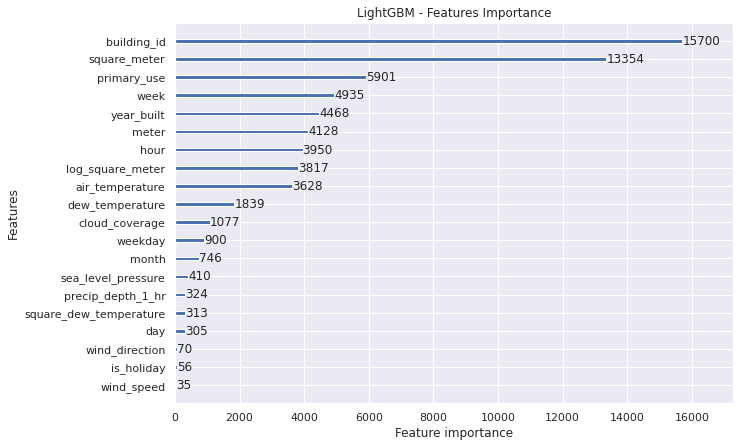

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
lgb.plot_importance(model, max_num_features=30, ax=ax)
plt.title("LightGBM - Features Importance");

6. Evaluacion del algoritmo Light GBM a traves de metricas establecidas.

In [ ]:
Y_pred = results
Y=np.array(test['meter_reading'].values).astype(float)
X=np.array(Y_pred)

In [ ]:
X_log=np.log1p(X)
Y_log=np.log1p(Y)


In [ ]:
metricas={ 'R2':   metrics.r2_score}
RMSLE=np.sqrt(metrics.mean_squared_error(Y_log, X_log))
MAE = metrics.mean_absolute_error(Y, X)
MSE = metrics.mean_squared_error(Y, X)
RMSE = np.sqrt(metrics.mean_squared_error(Y, X))
R2 = metricas['R2'](Y, X)

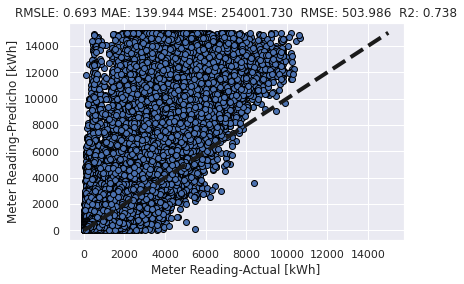

In [ ]:
# Gráfica de valor actual Kwh vs. predicción Kwh.
fig, ax = plt.subplots()
ax.scatter(X, Y, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()],
        [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Meter Reading-Actual [kWh]')
ax.set_ylabel('Meter Reading-Predicho [kWh]')
plt.title("RMSLE: %.3f MAE: %.3f MSE: %.3f  RMSE: %.3f  R2: %.3f" %
         (RMSLE,MAE,MSE,RMSE,R2))
plt.show()

7. Bibliografia:

1. Bohaju, J.(2020), ASHRAE energy prediccion III final model impelmentation lgbm. Recuperado de:https://github.com/Jakesh-Bohaju/ashrae-energy-prediction-III/blob/master/Final%20%20model%20implementation.ipynb. 

2. Evitan, G.(2020), ASHRAE EDA and preprocessing. Recuperado de: https://www.kaggle.com/gunesevitan/ashrae-eda-and-preprocessing/#data.

3. Jain, A. (2016), Complete machine learning guide to parameter tunning gradiente boosting (GBM) in Python. REcuperado de:https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
 
4. Kaggle/ASHRAE https://www.kaggle.com/takiyu/ashrae-great-energy-3-verification-after-predict.

5. Lupum,C.(2020), Kaggle notebook ASHRAE - ligthGBM simple fe.Recuperado de: https://www.kaggle.com/caesarlupum/ashrae-ligthgbm-simple-fe.

6. Macedo, C.(2019), Kagggle ASHRAE LGBM simple FE whith Python. Recuperado de:
https://www.kaggle.com/caesarlupum/ashrae-ligthgbm-simple-fe.


